In [1]:
from vtk import *
from vtk.util import numpy_support as VN
import meshio
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import linecache
import os
import sciPyFoam.polyMesh2d as mesh2d
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 12
mpl.rcParams['mathtext.fontset'] = 'cm'
dpi=600
fig_fmt=['svg']
# path----------
path_figures='../../../../../_figures'

## 1. Read and plot mesh information

Please use command `pip install sciPyFoam` to install a usefull python package to read polyMesh and plot mesh topology.

There are 5 functions are available in `sciPyFoam.polyMesh`
1. `x, y, z, cells_rect=mesh2d.readInternal('case/VTK/case_0.vtk')`
2. `faces = readFaces(caseDir)`
3. `owners = readOwner(caseDir)`
4. `neighbours = readNeighbour(caseDir)`
5. `boundaries, index_internalFaces, name_faces = readBoundary(caseDir,nFaces)`

**Interesting and smart design! the internal face index is consecutive and from zero.**

nPoints: 88, nPoints_2D: 44, nCells: 30
nBoundaries: 5,  ['left', 'right', 'top', 'bottom', 'frontAndBack']
nInternalFaces: 47


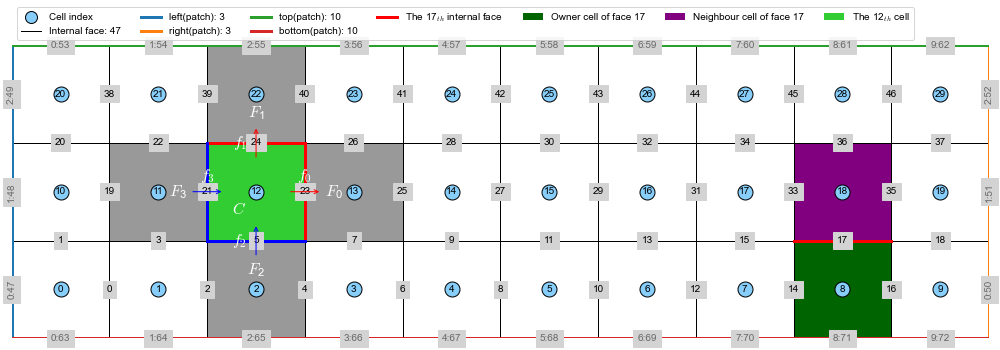

In [2]:
caseName='regularBox'
caseDir='../'

# plot 
fig=plt.figure(figsize=(14, 5))
ax=plt.gca()
ax.axis('scaled')
x,y,z,cells_rect,faces,boundaries,owners,neighbours=mesh2d.plotMeshTopology(ax,caseDir,ind_cell=12,index_intFace=17,lw=3)
# set axis
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.axis('off')
plt.tight_layout()
leg=ax.legend(ncol=7,loc='lower left', bbox_to_anchor=[0,1])
leg.legendHandles[0]._legmarker.set_markersize(12)
fname_fig= lambda fmt: str('%s/mesh_FVM_%s.%s'%(path_figures,caseName,fmt))
for fmt in fig_fmt:
    plt.savefig(fname_fig(fmt),dpi=dpi,bbox_inches='tight')

plt.show()

In [3]:
x, y, z, cells_rect=mesh2d.readInternal(caseDir)
faces = mesh2d.readFaces(caseDir)
owners = mesh2d.readOwner(caseDir)
neighbours = mesh2d.readNeighbour(caseDir)
boundaries, index_internalFaces, name_faces = mesh2d.readBoundary(caseDir,len(faces['nNodes']))

nPoints: 88, nPoints_2D: 44, nCells: 30
nBoundaries: 5,  ['left', 'right', 'top', 'bottom', 'frontAndBack']
nInternalFaces: 47


## 2. Boundary conditions

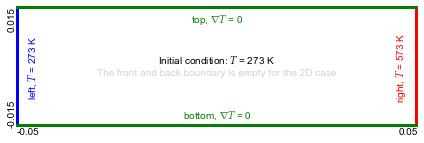

In [84]:
fig=plt.figure(figsize=(6,3))
ax=plt.gca()
bcs={'left':{'text':'$T$ = 273 K','lc':'b', 'x':[],'y':[], 'scale':[0.95,0]},
    'right':{'text':'$T$ = 573 K','lc':'r', 'x':[],'y':[], 'scale':[0.95,0]},
    'top':{'text':'$\\nabla T $ = 0','lc':'g', 'x':[],'y':[], 'scale':[0, 0.9]},
    'bottom':{'text':'$\\nabla T $ = 0','lc':'g', 'x':[],'y':[], 'scale':[0, 0.9]}}
ax.axis('scaled')
# print(faces)
for name,index in zip(boundaries['name'],boundaries['index']):
    if(name=='frontAndBack'):
        continue
    for patchIndex in index:
        x_bd,y_bd=x[faces['index'][patchIndex]], y[faces['index'][patchIndex]]
        ax.plot(x_bd,y_bd,color=bcs[name]['lc'],lw=6)
        bcs[name]['x'].append(x_bd)
        bcs[name]['y'].append(y_bd)
    bcs[name]['x'],bcs[name]['y']=np.array(bcs[name]['x']),np.array(bcs[name]['y'])
    if(bcs[name]['y'].min()==bcs[name]['y'].max()):
        ax.text(bcs[name]['x'].mean()*bcs[name]['scale'][0],bcs[name]['y'].mean()*bcs[name]['scale'][1], '%s, %s'%(name,bcs[name]['text']),ha='center',va=name,color=bcs[name]['lc'])
    elif(bcs[name]['x'].min()==bcs[name]['x'].max()):
        ax.text(bcs[name]['x'].mean()*bcs[name]['scale'][0],bcs[name]['y'].mean()*bcs[name]['scale'][1], '%s, %s'%(name,bcs[name]['text']),ha=name,va='center',rotation=90,color=bcs[name]['lc'])
ax.text(0.5,0.51,'Initial condition: $T$ = 273 K',va='bottom',ha='center',transform=ax.transAxes)
ax.text(0.5,0.49,'The front and back boundary is empty for the 2D case',va='top',ha='center',color='lightgray',transform=ax.transAxes)
ax.text(0,0,'%.2f'%(x.min()),ha='left',va='top',transform=ax.transAxes)
ax.text(1,0,'%.2f'%(x.max()),ha='right',va='top',transform=ax.transAxes)
ax.text(0,0,'%.3f'%(y.min()),ha='right',va='bottom',transform=ax.transAxes,rotation=90)
ax.text(0,1,'%.3f'%(y.max()),ha='right',va='top',transform=ax.transAxes,rotation=90)
# set axis
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.xaxis.set_ticks([x.min(), x.max()])
ax.yaxis.set_ticks([y.min(), y.max()])
# ax.set_xlabel('X (mm)')
# ax.set_ylabel('Y (mm)')
ax.axis('off')
plt.tight_layout()
# leg=ax.legend(ncol=7,loc='lower left', bbox_to_anchor=[0,1])
# leg.legendHandles[0]._legmarker.set_markersize(12)
fname_fig= lambda fmt: str('%s/boundaryConditions_FVM_%s.%s'%(path_figures,caseName,fmt))
for fmt in fig_fmt:
    plt.savefig(fname_fig(fmt),dpi=dpi,bbox_inches='tight')

plt.show()